### Importing Libraries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
from scipy import stats
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Embedding,LSTM
from tensorflow.python.keras.preprocessing.text import Tokenizer
from tensorflow.keras.optimizers import Adam 
from keras.layers import Dropout
from tensorflow.python.keras.preprocessing.sequence import pad_sequences
from tensorflow.python.keras.models import load_model
from sklearn.model_selection import train_test_split
import re
import nltk 
nltk.download("stopwords")
from nltk.corpus import stopwords
nltk.download('punkt')
import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\subra\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\subra\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
data = pd.read_csv(r"C:\Users\subra\OneDrive\Desktop\datasets\IMDB Dataset.csv")
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [3]:
# we are looking at the size of our data.
data.shape

(50000, 2)

#### Exploratory Data Analysis

In [4]:
data.isnull().sum()

review       0
sentiment    0
dtype: int64

No null values

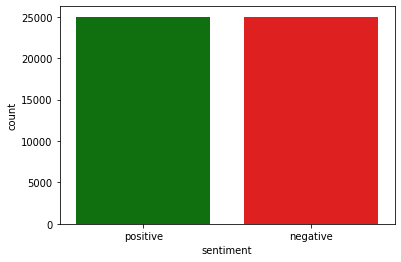

positive    25000
negative    25000
Name: sentiment, dtype: int64


In [5]:
sns.countplot(data["sentiment"], palette = ["green","red"])
plt.show()
print(data.sentiment.value_counts())

We see that the number of positive and negative comments is equal.

We convert our sentiment property to int values.

positive --> 1

negative --> 0

In [6]:
data.sentiment = [ 1 if each == "positive" else 0 for each in data.sentiment]


In [7]:
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


#### Generating word frequencies

In [8]:
def gen_freq(text):
    #will store all the words in list
    words_list = []
    
    #Loop over all the words and extract word from list
    for word in text.split():
        words_list.extend(word)
        
    #Generate word frequencies using value counts in word_list
    word_freq = pd.Series(words_list).value_counts()
    
    #print top 100 words
    word_freq[:100]
    
    return word_freq    

In [9]:
freq = gen_freq(data.review.str)
freq

the                568735
a                  306960
and                301919
of                 283625
to                 261850
                    ...  
"Mithi/Mithali"         1
(Konkona)               1
"Prof.Anu"              1
(Shabhana               1
Yosemite.<br            1
Length: 438729, dtype: int64

#### Word cloud using word frequencies

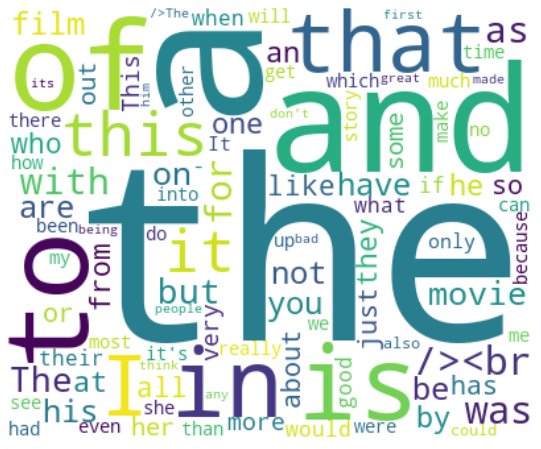

In [10]:
#Import library WordCloud
from wordcloud import WordCloud

#Generate word cloud
wc = WordCloud(width=400, height=330, max_words=100, background_color='white').generate_from_frequencies(freq)

plt.figure(figsize=(14,8))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

#### Word cloud using positive reviews

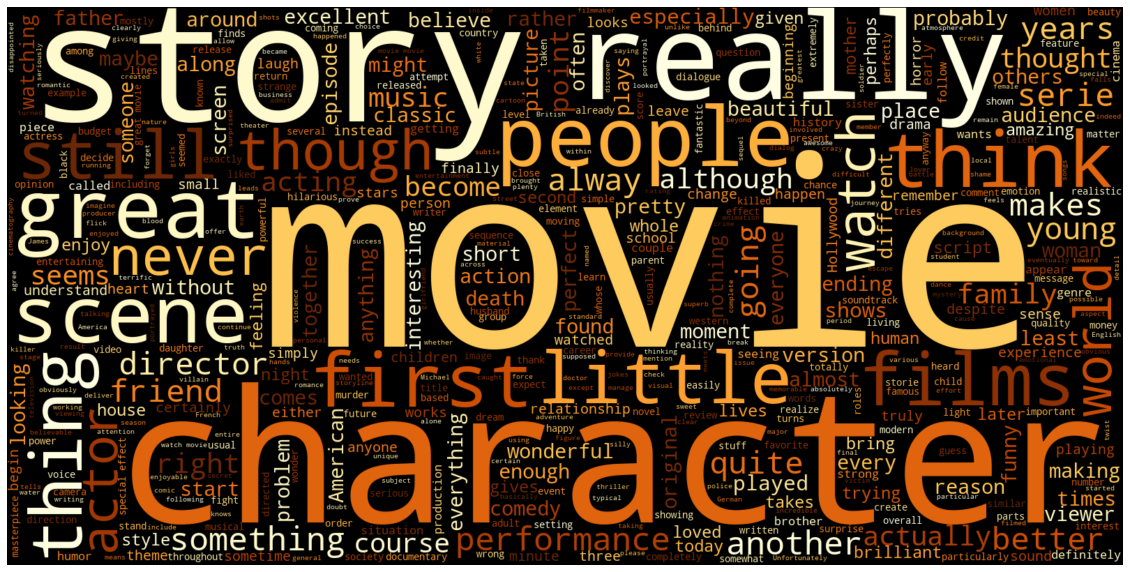

In [11]:
plt.figure(figsize = (20,20))
Wc = WordCloud(max_words = 500 , width = 1600 , height = 800,colormap="YlOrBr",
               min_word_length=5).generate(" ".join(data[data.sentiment == 1].review))

plt.axis("off")
plt.imshow(Wc , interpolation = 'bilinear')

#### Word cloud using negative reviews

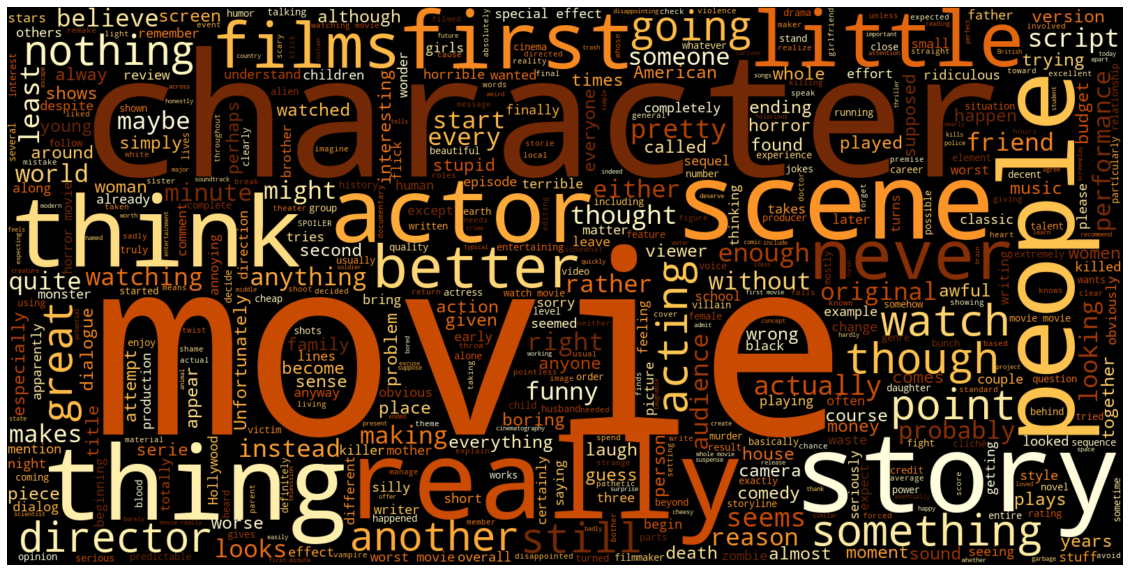

In [12]:
plt.figure(figsize = (20,20))
Wc = WordCloud(max_words = 500 , width = 1600 , height = 800,colormap="YlOrBr",
               min_word_length=5).generate(" ".join(data[data.sentiment == 0].review))

plt.axis("off")
plt.imshow(Wc , interpolation = 'bilinear')

#### Removing Stopwords

In [13]:
from nltk.corpus import stopwords
stop_word_list = stopwords.words('english')

In [14]:
from nltk.tokenize import word_tokenize,sent_tokenize
from nltk.tokenize.toktok import ToktokTokenizer

In [15]:
#Tokenization of text
tokenizer=ToktokTokenizer()

In [16]:
#removing the stopwords
def remove_stopwords(text, is_lower_case=False):
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stop_word_list]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stop_word_list]
    filtered_text = ' '.join(filtered_tokens)    
    return filtered_text
#Apply function on review column
data['review']= data['review'].apply(remove_stopwords)

#### Text Cleaning

process of clearing punctuation marks in data.

cleaning unnecessary marks in data. 

capitalization to lowercase. 

cleaning extra spaces. 

removal of stopwords in sentences.

In [17]:
import re
#clearing punctuation & unnecessary marks
data['review'] = data['review'].apply(lambda x: re.sub('[,\.!?:()"]', '', x))
data['review'] = data['review'].apply(lambda x: re.sub('[^a-zA-Z"]', ' ', x))

#capitalization to lowercase
data['review'] = data['review'].apply(lambda x: x.lower())

#cleaning extra spaces
data['review'] = data['review'].apply(lambda x: x.strip())

#### Removing html strips and noise text

In [18]:
from bs4 import BeautifulSoup

In [19]:
#Removing the html strips
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

#Removing the square brackets
def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)

#Removing the noisy text
def denoise_text(text):
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    return text

#Apply function on review column
data['review']=data['review'].apply(denoise_text)

In [20]:
data_copy = data.copy()

#### Generating Word clouds after text cleaning :

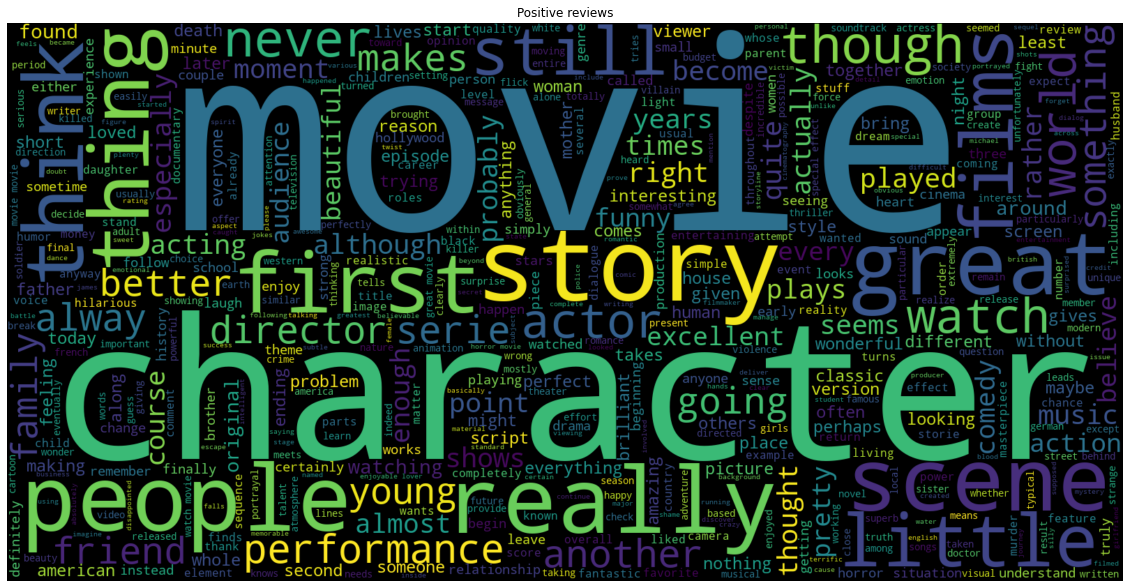

In [21]:
# POSITIVE REVIEWS
plt.figure(figsize = (20,20))
Wc = WordCloud(max_words = 500 , width = 1600 , height = 800,
               min_word_length=5).generate(" ".join(data[data.sentiment == 1].review))

plt.axis("off")
plt.title('Positive reviews')
plt.imshow(Wc , interpolation = 'bilinear')

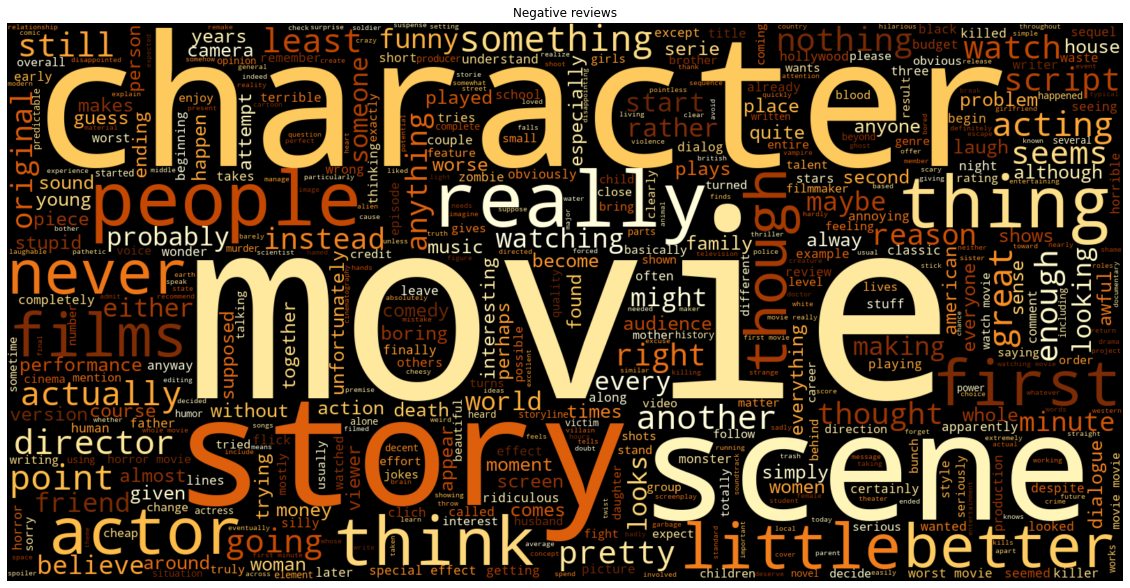

In [22]:
# Negative Reviews
plt.figure(figsize = (20,20))
Wc = WordCloud(max_words = 500 , width = 1600 , height = 800,colormap="YlOrBr",
               min_word_length=5).generate(" ".join(data[data.sentiment == 0].review))

plt.axis("off")
plt.title('Negative reviews')
plt.imshow(Wc , interpolation = 'bilinear')

#### Train - Test Split

In [23]:
sentiment = data['sentiment'].values
sentiment

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [24]:
data = data['review']

In [25]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data,sentiment,test_size = 0.2, random_state = 42)

#### Creating a Dictionary

We create a dictionary of 15000 most used words in English for later use.

In [26]:
from tensorflow.python.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words = 15000)
tokenizer.fit_on_texts(data)
#tokenizer.word_index

#### Bring the comments to the same size

comments of different lengths cannot train the model. That's why we need to make the sentences the same size.

In [27]:
x_train_tokens = tokenizer.texts_to_sequences(x_train)
x_test_tokens = tokenizer.texts_to_sequences(x_test)

We can replace the words in our sentences with whichever index they are included in the dictionary we have created above.

In [28]:
#Then we take the word count of each of our sentences in our data and create a list.
num_tokens = [len(tokens) for tokens in x_train_tokens + x_test_tokens]
num_tokens = np.array(num_tokens)

In [29]:
#Here, when setting the number of tokens, a number is determined by taking into account the variability around the average.
max_tokens = np.mean(num_tokens) + 2 * np.std(num_tokens)
max_tokens = int(max_tokens)
max_tokens

292

max_tokens : This value will allow us to reduce the distribution of sentences in our data and the sentences with opposite lengths, if any, to the average.

In [30]:
#It is checked what percentage of the data this determined number covers.
np.sum(num_tokens < max_tokens) / len(num_tokens)

0.9454

In [31]:
#data is adjusted according to the number of tokens specified
x_train_pad = pad_sequences(x_train_tokens, maxlen=max_tokens)
x_test_pad = pad_sequences(x_test_tokens, maxlen=max_tokens)

In [32]:
x_train_pad.shape

(40000, 292)

In [33]:
idx = tokenizer.word_index
inverse_map = dict(zip(idx.values(), idx.keys()))

def return_to_sentence(tokens):
    words = [inverse_map[token] for token in tokens if token!=0]
    text = ' '.join(words)
    return text

We write a function to revert the sentences that we have made int.

In [34]:
#normal comment
print(return_to_sentence(x_train_pad[9]))

thesis behind rise evil seems br br hitler bad man bad man hated jews case miss going fact every scene film br br there effort whatsoever try explain mood time hitler may adopted views strategy did needless say unlike generally excellent nazis warning history film neglected point fact nearly leaders munich communist rising jewish may views subject linking jews absolutely crucial aspect understanding much nazi era br br but much understanding done film makers going go got stuff knew anyway certainly get fascinating fact hitler briefly socialist communist immediately ww would course far complex film handle might even detract relentless bad away incessantly br br we know bad man however also know figure public speaker private situations could polite even sympathetic course views like anti alcohol anti smoking many guardian readers could agree with also famously fond animals hence wholly invented dog scene absurd br br he also accounts seen brave soldier ww whilst saw iron cross never get 

In [35]:
#token equivalent of comment
print(x_train_pad[9])

[13039   403  2074   352    88     1     1  2064    15    46    15    46
  1695  4385   303   586    73    96    76    49     3     1     1   271
   671  1516   244  1146  1136     7  2064   101  5224  2694 10670  1296
  3034    51   923  1187   210  3462  1635   369     3  6946   119    96
   692  6040 12722  4158  4186  2302   101  2694   685 14522  4385   306
  4159  1183  1656    14  2418   883     1     1   555    14  1656   120
     3  1115    73    54    93   406   569   441   310    16  1324    96
  2064  3101 11031  4158  1111  4883     9   158   123  1190     3  2718
   130     8  6436  6547    15   138 14934     1     1  2197    43    15
    46    95    19    43   729   937  9834  1856  1031    25  9357     8
  2091   158  2694     5   975  4630   975  3056    34  7503  6075    25
   913   876    19 14028  4150  1474  2818  5298  5109   675    49  1762
     1     1  2289    19  5945    35  2681  1424  4883  1710   111  3887
  1506    37    16    12  1292  9531   126  3034   

### LSTM Model

In [36]:
model = Sequential()

embedding_size = 50

model.add(Embedding(input_dim=15000,output_dim=embedding_size,input_length=max_tokens,name='embedding_layer'))

model.add(LSTM(units=16, return_sequences=True))
model.add(Dropout(0.1))

model.add(LSTM(units=8, return_sequences=True))
model.add(Dropout(0.1))

model.add(LSTM(units=4))
model.add(Dropout(0.1))

model.add(Dense(1, activation='sigmoid'))


model.compile(loss='binary_crossentropy',optimizer= "adam",metrics=['accuracy'])

In [37]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_layer (Embedding)  (None, 292, 50)           750000    
_________________________________________________________________
lstm (LSTM)                  (None, 292, 16)           4288      
_________________________________________________________________
module_wrapper (ModuleWrappe (None, 292, 16)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 292, 8)            800       
_________________________________________________________________
module_wrapper_1 (ModuleWrap (None, 292, 8)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 4)                 208       
_________________________________________________________________
module_wrapper_2 (ModuleWrap (None, 4)                 0

In [38]:
history = model.fit(x_train_pad, y_train, validation_split=0.3, epochs=5, batch_size=1000, shuffle=True, verbose = 1)

Epoch 1/5
28/28 [==============================] - 100s 3s/step - loss: 0.6886 - accuracy: 0.5722 - val_loss: 0.6732 - val_accuracy: 0.7537
Epoch 2/5
28/28 [==============================] - 82s 3s/step - loss: 0.6005 - accuracy: 0.8069 - val_loss: 0.5274 - val_accuracy: 0.8443
Epoch 3/5
28/28 [==============================] - 94s 3s/step - loss: 0.4932 - accuracy: 0.8687 - val_loss: 0.4911 - val_accuracy: 0.8396
Epoch 4/5
28/28 [==============================] - 84s 3s/step - loss: 0.4334 - accuracy: 0.8993 - val_loss: 0.4495 - val_accuracy: 0.8534
Epoch 5/5
28/28 [==============================] - 84s 3s/step - loss: 0.3748 - accuracy: 0.9227 - val_loss: 0.4134 - val_accuracy: 0.8649


#### Result

In [39]:
result = model.evaluate(x_test_pad, y_test)

313/313 [==============================] - 26s 77ms/step - loss: 0.4062 - accuracy: 0.8709


#### Visualization of Accuracy & Loss

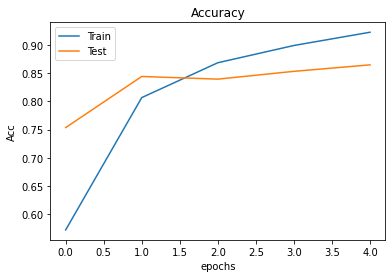

In [40]:
plt.figure()
plt.plot(history.history["accuracy"], label = "Train")
plt.plot(history.history["val_accuracy"], label = "Test")
plt.title("Accuracy")
plt.ylabel("Acc")
plt.xlabel("epochs")
plt.legend()
plt.show()

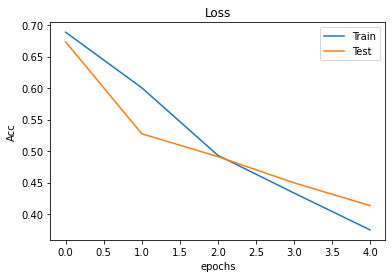

In [41]:
plt.figure()
plt.plot(history.history["loss"], label = "Train")
plt.plot(history.history["val_loss"], label = "Test")
plt.title("Loss")
plt.ylabel("Acc")
plt.xlabel("epochs")
plt.legend()
plt.show()

#### BERT

In [42]:
"""train, test= train_test_split(data_copy, test_size=0.2, random_state=42)
Xtrain, ytrain = train['review'], train['sentiment']
Xtest, ytest = test['review'], test['sentiment']
#splitting the train set into train and validation
Xtrain,Xval,ytrain,yval=train_test_split(Xtrain,ytrain,test_size=0.2,random_state=10)"""

"train, test= train_test_split(data_copy, test_size=0.2, random_state=42)\nXtrain, ytrain = train['review'], train['sentiment']\nXtest, ytest = test['review'], test['sentiment']\n#splitting the train set into train and validation\nXtrain,Xval,ytrain,yval=train_test_split(Xtrain,ytrain,test_size=0.2,random_state=10)"

In [43]:
"""#set up the tokenizer
MAX_VOCAB_SIZE = 10000
tk = Tokenizer(num_words = MAX_VOCAB_SIZE,oov_token="<oov>")
tk.fit_on_texts(Xtrain)
word_index = tk.word_index
#print(word_index)
V = len(word_index)
print("Vocabulary of the dataset is : ",V)"""

'#set up the tokenizer\nMAX_VOCAB_SIZE = 10000\ntk = Tokenizer(num_words = MAX_VOCAB_SIZE,oov_token="<oov>")\ntk.fit_on_texts(Xtrain)\nword_index = tk.word_index\n#print(word_index)\nV = len(word_index)\nprint("Vocabulary of the dataset is : ",V)'

In [44]:
"""##create sequences of reviews
seq_train = tk.texts_to_sequences(Xtrain)
seq_test =  tk.texts_to_sequences(Xtest)"""

'##create sequences of reviews\nseq_train = tk.texts_to_sequences(Xtrain)\nseq_test =  tk.texts_to_sequences(Xtest)'

In [45]:
"""#choice of maximum length of sequences
seq_len_list = [len(i) for i in seq_train + seq_test]

#if we take the direct maximum then
max_len=max(seq_len_list)
print('Maximum length of sequence in the list: {}'.format(max_len))"""

"#choice of maximum length of sequences\nseq_len_list = [len(i) for i in seq_train + seq_test]\n\n#if we take the direct maximum then\nmax_len=max(seq_len_list)\nprint('Maximum length of sequence in the list: {}'.format(max_len))"

In [46]:
"""# when setting the maximum length of sequence, variability around the average is used.
max_seq_len = np.mean(seq_len_list) + 2 * np.std(seq_len_list)
max_seq_len = int(max_seq_len)
print('Maximum length of the sequence when considering data only two standard deviations from average: {}'.format(max_seq_len))"""

"# when setting the maximum length of sequence, variability around the average is used.\nmax_seq_len = np.mean(seq_len_list) + 2 * np.std(seq_len_list)\nmax_seq_len = int(max_seq_len)\nprint('Maximum length of the sequence when considering data only two standard deviations from average: {}'.format(max_seq_len))"

In [47]:
"""import transformers
#Perform tokenization
# automatically download the vocab used during pretraining or fine-tuning a given model,use from_pretrained() method
tokenizer = transformers.AutoTokenizer.from_pretrained('distilbert-base-uncased')"""

"import transformers\n#Perform tokenization\n# automatically download the vocab used during pretraining or fine-tuning a given model,use from_pretrained() method\ntokenizer = transformers.AutoTokenizer.from_pretrained('distilbert-base-uncased')"

In [48]:
"""#pass our texts to the tokenizer. 
Xtrain_enc = tokenizer(Xtrain.tolist(), max_length=max_seq_len, 
                         truncation=True, padding='max_length', 
                         add_special_tokens=True, return_tensors='np') #return numpy object
Xval_enc = tokenizer(Xval.tolist(), max_length=max_seq_len, 
                         truncation=True, padding='max_length', 
                         add_special_tokens=True, return_tensors='np') #return numpy object
Xtest_enc = tokenizer(Xtest.tolist(), max_length=max_seq_len, 
                         truncation=True, padding='max_length', 
                         add_special_tokens=True, return_tensors='np') #return numpy object"""

"#pass our texts to the tokenizer. \nXtrain_enc = tokenizer(Xtrain.tolist(), max_length=max_seq_len, \n                         truncation=True, padding='max_length', \n                         add_special_tokens=True, return_tensors='np') #return numpy object\nXval_enc = tokenizer(Xval.tolist(), max_length=max_seq_len, \n                         truncation=True, padding='max_length', \n                         add_special_tokens=True, return_tensors='np') #return numpy object\nXtest_enc = tokenizer(Xtest.tolist(), max_length=max_seq_len, \n                         truncation=True, padding='max_length', \n                         add_special_tokens=True, return_tensors='np') #return numpy object"

In [49]:
"""import tensorflow as tf
#preparing our datasets
train_dataset = tf.data.Dataset.from_tensor_slices((
    dict(Xtrain_enc),
    ytrain
))
val_dataset = tf.data.Dataset.from_tensor_slices((
    dict(Xval_enc),
    yval
))
test_dataset = tf.data.Dataset.from_tensor_slices((
    dict(Xtest_enc),
    ytest
))"""

'import tensorflow as tf\n#preparing our datasets\ntrain_dataset = tf.data.Dataset.from_tensor_slices((\n    dict(Xtrain_enc),\n    ytrain\n))\nval_dataset = tf.data.Dataset.from_tensor_slices((\n    dict(Xval_enc),\n    yval\n))\ntest_dataset = tf.data.Dataset.from_tensor_slices((\n    dict(Xtest_enc),\n    ytest\n))'

In [50]:
"""# creating BERT Model
from tensorflow.keras.layers import Dense,Input, Embedding,LSTM,Dropout,Conv1D
from tensorflow.keras.models import Model
def bert_model(train_dataset,val_dataset,transformer,max_len,epochs):
    print("----Building the model----")
    input_ids = Input(shape=(max_len,), dtype=tf.int32, name="input_ids")
    attention_mask = Input(shape=(max_len,),dtype=tf.int32,name = 'attention_mask') #attention mask
    sequence_output = transformer(input_ids,attention_mask)[0]
    cls_token = sequence_output[:, 0, :]
    x = Dense(512, activation='relu')(cls_token)
    x = Dropout(0.1)(x)
    y = Dense(1, activation='sigmoid')(x)
    model = Model(inputs=[input_ids,attention_mask], outputs=y)
    model.summary()
    model.compile(optimizer= "adam", loss='binary_crossentropy', metrics=['accuracy'])
    r = model.fit(train_dataset.batch(32),batch_size = 32,
                  validation_data = val_dataset.batch(32),epochs = epochs)
                  #callbacks = callbacks
    print("Train score:", model.evaluate(train_dataset.batch(32)))
    print("Validation score:", model.evaluate(val_dataset.batch(32)))
    n_epochs = len(r.history['loss'])
    
    return r,model,n_epochs"""

'# creating BERT Model\nfrom tensorflow.keras.layers import Dense,Input, Embedding,LSTM,Dropout,Conv1D\nfrom tensorflow.keras.models import Model\ndef bert_model(train_dataset,val_dataset,transformer,max_len,epochs):\n    print("----Building the model----")\n    input_ids = Input(shape=(max_len,), dtype=tf.int32, name="input_ids")\n    attention_mask = Input(shape=(max_len,),dtype=tf.int32,name = \'attention_mask\') #attention mask\n    sequence_output = transformer(input_ids,attention_mask)[0]\n    cls_token = sequence_output[:, 0, :]\n    x = Dense(512, activation=\'relu\')(cls_token)\n    x = Dropout(0.1)(x)\n    y = Dense(1, activation=\'sigmoid\')(x)\n    model = Model(inputs=[input_ids,attention_mask], outputs=y)\n    model.summary()\n    model.compile(optimizer= "adam", loss=\'binary_crossentropy\', metrics=[\'accuracy\'])\n    r = model.fit(train_dataset.batch(32),batch_size = 32,\n                  validation_data = val_dataset.batch(32),epochs = epochs)\n                  #ca

In [51]:
"""transformer = transformers.TFDistilBertModel.from_pretrained('distilbert-base-uncased')"""

"transformer = transformers.TFDistilBertModel.from_pretrained('distilbert-base-uncased')"

In [52]:
"""epochs = 1
max_len = max_seq_len
r,model,n_epochs = bert_model(train_dataset,val_dataset,transformer,max_len,epochs)"""

'epochs = 1\nmax_len = max_seq_len\nr,model,n_epochs = bert_model(train_dataset,val_dataset,transformer,max_len,epochs)'

#### Linear SVC

In [53]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline

In [54]:
text_clf = Pipeline([('tfidf', TfidfVectorizer()),
                     ('clf', LinearSVC()),])

In [55]:
text_clf.fit(x_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', LinearSVC())])

In [56]:
from sklearn.metrics import accuracy_score
predictions = text_clf.predict(x_train)
accuracy_train = accuracy_score(y_train, predictions)
print('Accuracy Score for train :',accuracy_train)

Accuracy Score for train : 0.988425


In [57]:
predictions = text_clf.predict(x_test)
accuracy_test = accuracy_score(y_test, predictions)
print('Accuracy Score for test :',accuracy_test)

Accuracy Score for test : 0.8952
